### Bond value

#### Constant simple rate

**Question**

A 2-year bond has a $4\%$ coupon rate.

The `simple rate` is constant $3\%$.

What is the current Fair Value of the bond ?

**Answer**

Conventions: notional is 100, coupon payment is semi-annual.

Sum of the PVs of all future cash flows: 

$$\frac{2}{1+\frac{1}{2}\cdot 0.03}+\frac{2}{1+0.03}+\frac{2}{1+\frac{3}{2}\cdot 0.03}+\frac{102}{1+2\cdot 0.03}$$

In [1]:
pv = 2 / (1 + 0.5 * 0.03) + 2 / (1 + 0.03) + 2 / (1 + 1.5 * 0.03) + 102 / (1 + 2 * 0.03)
print(f'{pv:.3f}')

102.052


#### Constant zero coupon rate

**Question**

A 2-year bond has a $4\%$ coupon rate.

The `zero coupon rate` is constant $3\%$.

What is the current Fair Value of the bond ?

**Answer**

Sum of the PVs of all future cash flows: 

$$
\frac{2}{1+\frac{0.03}{2}} 
\, + \,
\frac{2}{\left(1+\frac{0.03}{2}\right)^{2}}
\, + \,
\frac{2}{\left(1+\frac{0.03}{2}\right)^{3}}
\, + \,
\frac{102}{\left(1+\frac{0.03}{2}\right)^{4}}
$$



In [2]:
pv = 2 / (1 + 0.5 * 0.03) + 2 / (1 + 0.5 * 0.03) ** 2 + 2 / (1 + 0.5 * 0.03) ** 3 + 102 / (1 + 0.5 * 0.03) ** 4
print(f'{pv:.3f}')

101.927


#### Variable simple rate or zero coupon rate

**Question**

A 2-year bond has a $6\%$ coupon rate.

(a) The simple rate is 6M: $5\%$, 1Y: $5.5\%$, 18M: $5.8\%$, 2Y: $6.1\%$.

(b) The above numbers are the zero rate.

What is the current Fair Value of the bond ?

**Answer**

Sum of the PVs of all future cash flows

(a) with the `simple rate` :
$\,\,\,\,\displaystyle{\frac{3}{1+\frac{1}{2}\cdot 0.05}+\frac{3}{1+0.055}+\frac{3}{1+\frac{3}{2}\cdot 0.058}+\frac{103}{1+2\cdot 0.061}}$

(b) with the `zero coupon rate` :
$\,\,\,\,
\displaystyle{\frac{3}{1+\frac{1}{2}\cdot 0.05}
+
\frac{3}{\left(1+\frac{1}{2}\cdot 0.055\right)^2}
+
\frac{3}{\left(1+\frac{1}{2}\cdot 0.058\right)^3}
+
\frac{103}{\left(1+\frac{1}{2}\cdot 0.061\right)^4}}$



In [3]:
NOTIONAL = 100
PRECISION_DIGITS = 3
RATES = {'6m': 0.05, '1y': 0.055, '18m': 0.058, '2y': 0.061}
from numbers import Number


def two_year_bond_PV(yearly_coupon_percent=None, rate=None, rate_type='zero coupon rate'):
    """
    Calculation of the sum of the PVs of future cash flows received by the holder of the bond
    Discounting can be provided either by the simple rate or the zero coupon rate
    Coupon payment is semi-annual
    """
    assert isinstance(yearly_coupon_percent, Number), 'Please provide a number for "yearly_coupon_percent"'
    assert isinstance(rate, dict), '"rate" should be a dict'
    for t in ['6m', '1y', '18m', '2y']:
        assert t in rate, f'"rate" must provide a value for time={t}'

    coupon_frequency = 2  # twice per year
    coupon = NOTIONAL * yearly_coupon_percent / 100.0 / coupon_frequency

    if rate_type == 'simple rate':
        value = (coupon /              (1 + 0.5 * rate['6m'] ) +
                 coupon /              (1 + 1.0 * rate['1y'] ) +
                 coupon /              (1 + 1.5 * rate['18m']) +
                 (NOTIONAL + coupon) / (1 + 2.0 * rate['2y'] )
                )
    elif rate_type == 'zero coupon rate':
        value = (coupon /              (1 + 0.5 * rate['6m'] ) +
                 coupon /              (1 + 0.5 * rate['1y'] ) ** 2.0 +
                 coupon /              (1 + 0.5 * rate['18m']) ** 3.0 +
                 (NOTIONAL + coupon) / (1 + 0.5 * rate['2y'] ) ** 4.0
                )
    else:
        raise ValueError(f'This rate_type is not available: {rate_type}')
        
    return value


price = two_year_bond_PV(yearly_coupon_percent=6, rate=RATES, rate_type='simple rate')
print(f'Bond PV using the **simple** rate: {price:.{PRECISION_DIGITS}f}')

price = two_year_bond_PV(yearly_coupon_percent=6, rate=RATES)
print(f'Bond PV using the **zero coupon** rate: {price:.{PRECISION_DIGITS}f}')

Bond PV using the **simple** rate: 100.331
Bond PV using the **zero coupon** rate: 99.859


### Bond yield, also called: Yield to maturity

The zero coupon rate that makes the sum of the PVs of future cash flows equal to the current market price. 

Note that a bond yield means the same rate for the discounting for all future time points (cash flows).

In [4]:
from scipy.optimize import root_scalar

CURRENT_MARKET_VALUE = 98.03
YEARLY_COUPON_PERCENT = 6


def two_year_bond_PV_vs_bond_yield(bond_yield, yearly_coupon_percent=YEARLY_COUPON_PERCENT):
    yield_curve_with_zero_coupon_rate = {'6m': bond_yield, '1y': bond_yield, '18m': bond_yield, '2y': bond_yield}
    return two_year_bond_PV(yearly_coupon_percent=yearly_coupon_percent, rate=yield_curve_with_zero_coupon_rate)


def difference_of_calculated_PV_from_market_value(bond_yield, current_market_value=CURRENT_MARKET_VALUE):
    return two_year_bond_PV_vs_bond_yield(bond_yield) - current_market_value


bond_yield = root_scalar(difference_of_calculated_PV_from_market_value, bracket=[0,1]).root

print(f'Bond yield is {100 * bond_yield:.2f}%')

Bond yield is 7.07%


### Par yield
Par value means face value of the bond.

The par yield is the yield that makes the calculated PV equal to the par value.

In [7]:
PAR_VALUE = NOTIONAL


def difference_of_calculated_PV_from_par_value(bond_yield, par_value=PAR_VALUE):
    return two_year_bond_PV_vs_bond_yield(bond_yield) - par_value


par_yield = root_scalar(difference_of_calculated_PV_from_par_value, bracket=[0,1]).root

print(f'The par value is {PAR_VALUE}. The par yield is {100 * par_yield:.2f}%')

The par value is 100. The par yield is 6.00%


### Bond Yield vs Bond Price. Duration and Convexity.
<span style="color:red;background-color:yellow;font-weight:bold;">TODO</span>

(1) with code: graphical , (2) formulae

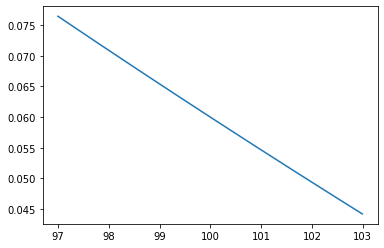

In [21]:
import numpy as np
import matplotlib.pyplot as plt

prices = np.arange(97.0, 103.0, 0.01)
yields = []

for price in prices:
    def f(bond_yield):
        return difference_of_calculated_PV_from_market_value(bond_yield, current_market_value=price)
    yields.append(root_scalar(f, bracket=[0,1]).root)

plt.plot(prices, yields)


### Bootstrapping

<span style="color:red;background-color:yellow;font-weight:bold;">TODO</span>

**Question**

A half-year bond has a $6\%$ coupon rate.

The current market price of the bond is 96.

What is the simple rate for $T=0.5$ ?

$$96 = \rm{FV} = \frac{103}{1+0.5*L\left(0.5\right)} $$ 

$$ L\left(0.5\right) = 2 \left(\frac{103}{96}-1\right)$$

In [6]:
2*(103/96-1)

0.14583333333333348